# Stochastic Discrete Model

In [35]:
import copy
import numpy as np
import sys
import seaborn as sb
import random as random
import matplotlib.pyplot as plt
from utils.point import Point
from environment.agents.fixed_velocity_agent import FixedVelocityAgent

In [36]:
def show_grid(M):
    min_val = np.min(M)
    max_val = np.max(M)
    sum_val = np.sum(M)

    fig, ax = plt.subplots(figsize=(20,6))
    sb.heatmap(M, annot=True, fmt=".4f", cmap='Blues',
           vmin=np.min(M), vmax=np.max(M), cbar_kws={"shrink": .8})
    plt.show()

    print(f'sum of mat cells: {sum_val}')
    print(f'max value is: {max_val}')
    print(f'min value is: {min_val}')

In [37]:
def sum_mats(mats):
    total = np.zeros((size,size))
    for mat in mats:
        total += mat
    return total

## initial state (lowest layer of the 3d position matrix PM)

In [38]:
random.seed(6)
size = 16
probs = [0.2, 0.6, 0.2]
agents = [FixedVelocityAgent(Point(6,1),1),
          FixedVelocityAgent(Point(8,2),1),
          FixedVelocityAgent(Point(9,1),1),
          FixedVelocityAgent(Point(11,3),1)]
max_damage = [size for agent in agents]

agents_probs = [np.zeros((size,size)) for _ in agents]
for i in range(len(agents)):
    agent = agents[i]
    c,r = agent.xy
    agents_probs[i][r][c] = 1

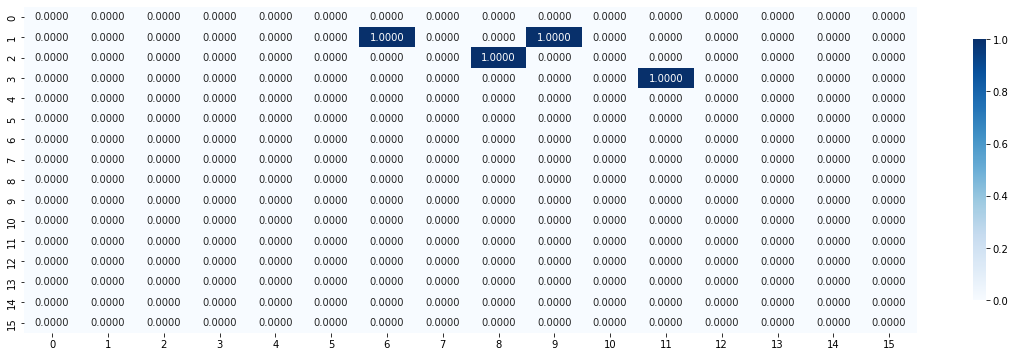

sum of mat cells: 4.0
max value is: 1.0
min value is: 0.0


In [39]:
PM0 = sum_mats(agents_probs)
show_grid(PM0)

## calculating the position matrix PM

In [43]:
def advance(M):
    for i in range(len(M)-1):
        for j in range(1,len(M)-1):
            left = M[i+1][j-1]
            under = M[i+1][j]
            right = M[i+1][j+1]
            M[i][j] = probs[0] * left + probs[1] * under + probs[2] * right
    for i in range(1,len(M)-1):
        M[len(M)-1][i] = 0
    return M

In [44]:
T = size - min([a.y for a in agents])
T

[1, 2, 1, 3]


15

In [ ]:
agents_probs = copy.deepcopy(agents_probs)
PM = copy.deepcopy(agents_probs)
for _ in range(T):
    for i in range(len(agents)):
        agents_probs[i] = advance(agents_probs[i])

In [ ]:
show_grid()

In [42]:
## calculating the utility matrix